In [29]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=HVVN19TCDTJCN9NE'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2022-01-28', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2022-01-28': {'1. open': '133.1900', '2. high': '134.5300', '3. low': '131.7900', '4. close': '134.5000', '5. volume': '5471497'}, '2022-01-27': {'1. open': '133.6600', '2. high': '134.7500', '3. low': '132.0800', '4. close': '132.5200', '5. volume': '5499566'}, '2022-01-26': {'1. open': '136.4700', '2. high': '137.0700', '3. low': '133.1300', '4. close': '134.2600', '5. volume': '8335992'}, '2022-01-25': {'1. open': '129.1400', '2. high': '137.3361', '3. low': '128.3000', '4. close': '136.1000', '5. volume': '19715698'}, '2022-01-24': {'1. open': '127.9900', '2. high': '129.1500', '3. low': '124.1930', '4. close': '128.8200', '5. volume': '13777648'}, '2022-01-21': {'1. open': '131.6500', '2. high': '131.8700', '3. low': '129.2700', '4. close': '129.3500', '5. vo

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
import math

In [32]:
df_ibm = pd.read_csv('/content/drive/MyDrive/daily_IBM.csv')
df_ibm

,timestamp,open,high,low,close,volume
0,2022-01-28,133.19,134.5300,131.790,134.50,5471497
1,2022-01-27,133.66,134.7500,132.080,132.52,5499566
2,2022-01-26,136.47,137.0700,133.130,134.26,8335992
3,2022-01-25,129.14,137.3361,128.300,136.10,19715698
4,2022-01-24,127.99,129.1500,124.193,128.82,13777648
...,...,...,...,...,...,...
5593,1999-11-05,92.75,92.9400,90.190,90.25,13737600
5594,1999-11-04,94.44,94.4400,90.000,91.56,16697600
5595,1999-11-03,95.87,95.9400,93.500,94.37,10369100
5596,1999-11-02,96.75,96.8100,93.690,94.81,11105400


In [33]:
df1 = df_ibm.iloc[::-1]
df1

,timestamp,open,high,low,close,volume
5597,1999-11-01,98.50,98.8100,96.370,96.75,9551800
5596,1999-11-02,96.75,96.8100,93.690,94.81,11105400
5595,1999-11-03,95.87,95.9400,93.500,94.37,10369100
5594,1999-11-04,94.44,94.4400,90.000,91.56,16697600
5593,1999-11-05,92.75,92.9400,90.190,90.25,13737600
...,...,...,...,...,...,...
4,2022-01-24,127.99,129.1500,124.193,128.82,13777648
3,2022-01-25,129.14,137.3361,128.300,136.10,19715698
2,2022-01-26,136.47,137.0700,133.130,134.26,8335992
1,2022-01-27,133.66,134.7500,132.080,132.52,5499566


In [34]:
df1.shape

(5598, 6)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5598 entries, 5597 to 0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5598 non-null   object 
 1   open       5598 non-null   float64
 2   high       5598 non-null   float64
 3   low        5598 non-null   float64
 4   close      5598 non-null   float64
 5   volume     5598 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 262.5+ KB


In [36]:
df1.describe()

,open,high,low,close,volume
count,5598.000000,5598.000000,5598.000000,5598.000000,5.598000e+03
mean,129.248555,130.427084,128.153167,129.305274,6.071260e+06
std,36.630756,36.686280,36.581169,36.639588,3.329571e+06
min,54.650000,56.700000,54.010000,55.070000,1.928430e+05
25%,96.812500,98.055000,96.002500,97.005000,3.848904e+06
50%,125.180000,126.509950,124.130000,125.265000,5.247700e+06
75%,154.522500,155.772500,153.540000,154.757500,7.330700e+06
max,215.380000,215.900000,214.300000,215.800000,4.120730e+07


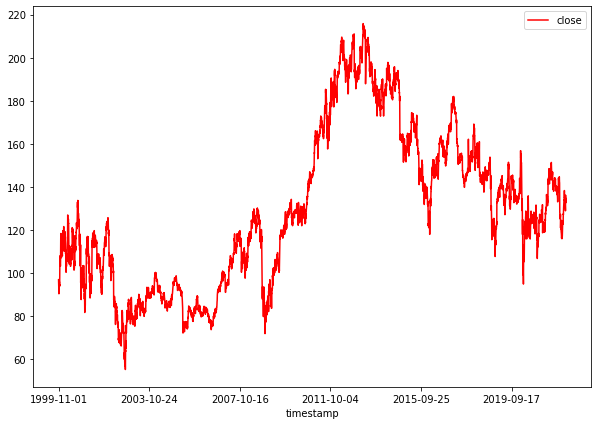

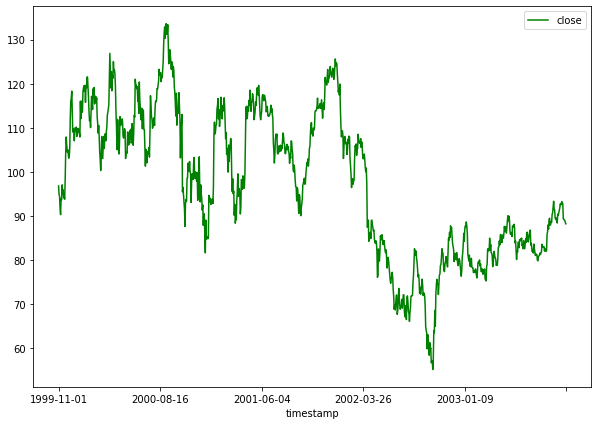

In [69]:
df1.plot('timestamp','close',color="red",figsize=(10,7))
 
# Extract only top 60 rows to make the plot a little clearer
new_data = df1.head(1000)
 
#  Plotting date vs the close  market stock price
new_data.plot('timestamp','close',color="green",figsize=(10,7))
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


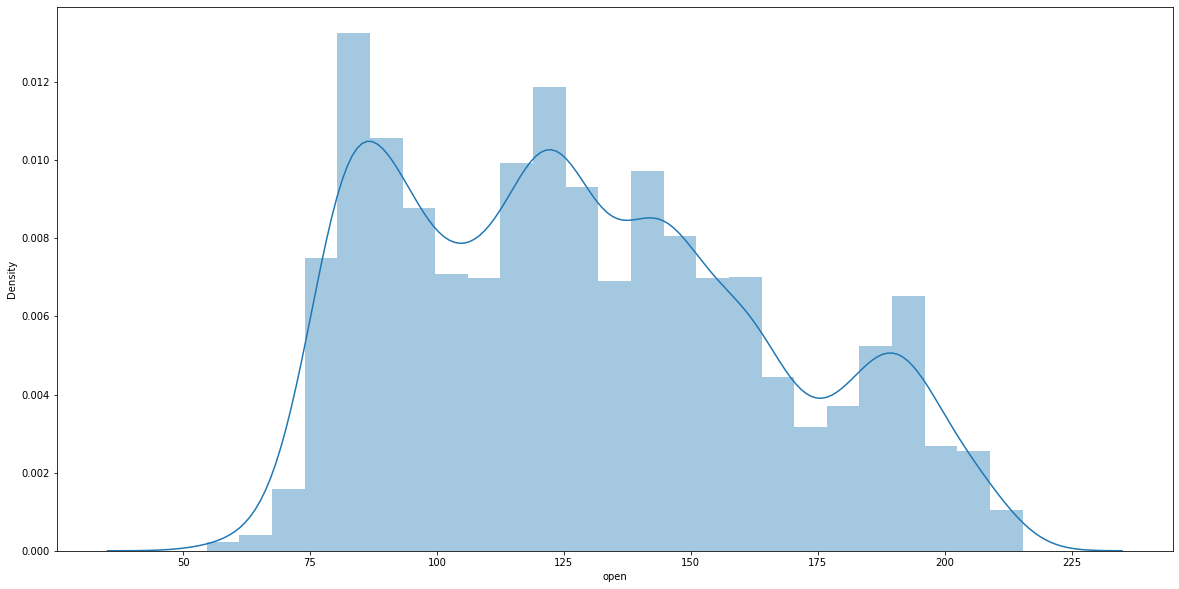

In [59]:
sns.distplot(df1.open)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


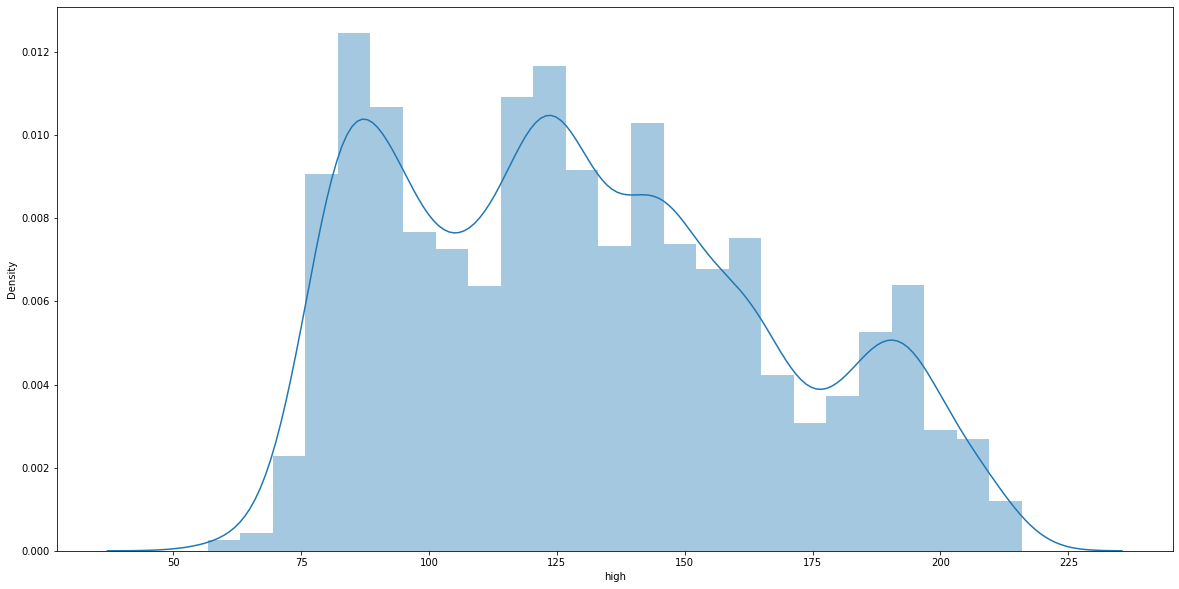

In [39]:
sns.distplot(df1.high)

In [40]:
close_data = df1.filter(['close'])

In [41]:
dataset = close_data.values

In [42]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [43]:
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]

In [44]:
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])

In [45]:
x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)

In [46]:
x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [48]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

3859/3859 [==============================] - 117s 29ms/step - loss: 0.0014


In [50]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [51]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [52]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

7.201467199512465


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


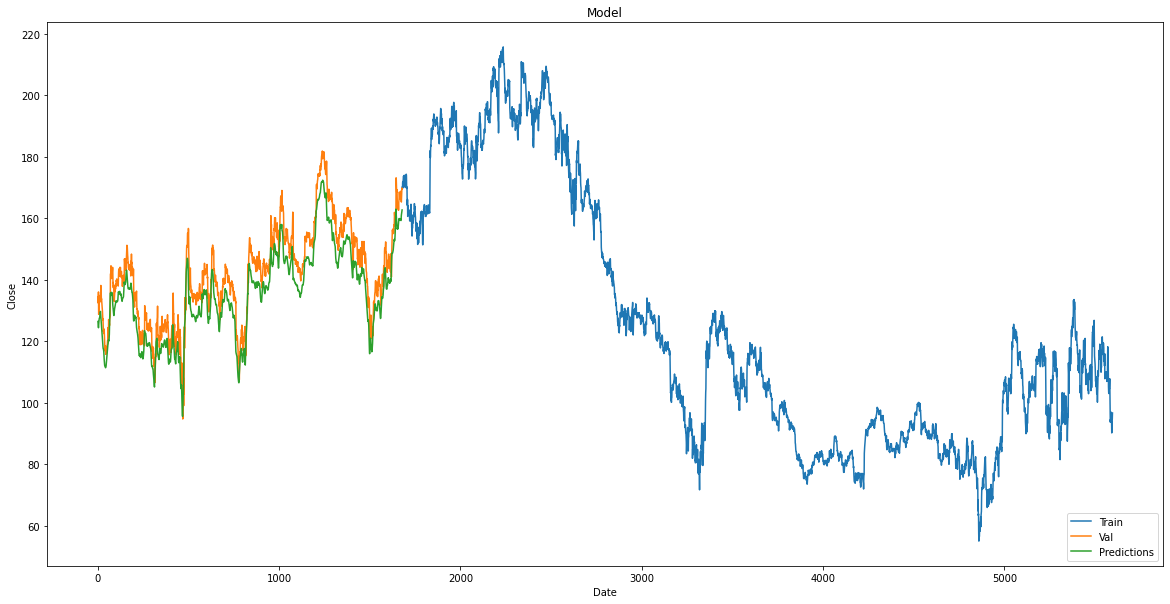

In [53]:
train = df1[:training_data_len]
valid = df1[training_data_len:]
 
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

In [54]:
print(valid.Predictions)

1678    162.774078
1677    162.381516
1676    162.144638
1675    161.704880
1674    161.096863
           ...    
4       125.316139
3       124.459183
2       125.205872
1       126.071602
0       126.495842
Name: Predictions, Length: 1679, dtype: float32


In [66]:
import joblib  

joblib.dump(predictions, 'modell_ibm1.pkl') 

ridge_from_joblib = model = joblib.load("modell_ibm1.pkl")

In [ ]:
from flask import Flask, render_template, request
import utils

app = Flask(__name__)

@app.route('/')
def main():
    return render_template('index.html')

@app.route('/predict/', methods = ['GET', 'POST'])
def predict():
    if request.method == 'POST':
        Open = request.form.get('Open')
        High = request.form.get('High')
        Low = request.form.get('Low')
        Volume = request.form.get('Volume')
    
    prediction = utils.preprocess(Open, High, Low, Volume)

    return render_template('prediction.html', prediction = prediction)



# @app.errorhandler(404)
# def error(e): 
#     return render_template('404.html')

if __name__ == "__main__":
    app.run(debug=True)